<a href="https://colab.research.google.com/github/kannankumar/jupyter-notebooks/blob/hindi-digit-gan/Hindi_Conditional_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hindi Digits generation using Conditional-DCGAN 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/DHCD/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%%bash
mkdir devanagiri
cp "gdrive/My Drive/DHCD/Train.zip" ./devanagiri/
cp "gdrive/My Drive/DHCD/Test.zip" ./devanagiri/

unzip -q devanagiri/Train.zip
unzip -q devanagiri/Test.zip

rm -rf devanagiri

In [0]:
import os

print("Current Dir: " ,os.getcwd())
test_dir = os.path.join("Test")
train_dir = os.path.join("Train")

print("Train Dir: ")
train_counts = {dr: len(os.listdir(os.path.join(train_dir, dr))) for dr in sorted(os.listdir(train_dir))}
print(train_counts)

print(max(list(train_counts.values())))
print(min(list(train_counts.values())))

print("Test Dir:")
test_counts = {dr: len(os.listdir(os.path.join(test_dir, dr))) for dr in sorted(os.listdir(test_dir))}
print(test_counts)

print(max(list(test_counts.values())))
print(min(list(test_counts.values())))

Current Dir:  /content
Train Dir: 
{'character_10_yna': 1700, 'character_11_taamatar': 1700, 'character_12_thaa': 1700, 'character_13_daa': 1700, 'character_14_dhaa': 1700, 'character_15_adna': 1700, 'character_16_tabala': 1700, 'character_17_tha': 1700, 'character_18_da': 1700, 'character_19_dha': 1700, 'character_1_ka': 1700, 'character_20_na': 1700, 'character_21_pa': 1700, 'character_22_pha': 1700, 'character_23_ba': 1700, 'character_24_bha': 1700, 'character_25_ma': 1700, 'character_26_yaw': 1700, 'character_27_ra': 1700, 'character_28_la': 1700, 'character_29_waw': 1700, 'character_2_kha': 1700, 'character_30_motosaw': 1700, 'character_31_petchiryakha': 1700, 'character_32_patalosaw': 1700, 'character_33_ha': 1700, 'character_34_chhya': 1700, 'character_35_tra': 1700, 'character_36_gya': 1700, 'character_3_ga': 1700, 'character_4_gha': 1700, 'character_5_kna': 1700, 'character_6_cha': 1700, 'character_7_chha': 1700, 'character_8_ja': 1700, 'character_9_jha': 1700, 'digit_0': 1700

In [0]:
import fnmatch
import os
import shutil

train_dig_dir = os.path.join('train-digits')

if not os.path.exists(train_dig_dir):
  os.mkdir(train_dig_dir)

# loop through train dir
for dr in os.listdir(train_dir):
  # match dr with "digit*"
  src_dir = os.path.join(train_dir, dr)
  if os.path.isdir(src_dir) and fnmatch.fnmatch(dr, 'digit*'):
        print(dr)
        
        # copy directory if it matches 'digit*'
        dst_dir = os.path.join(train_dig_dir, dr)
        shutil.copytree(src=src_dir, dst=dst_dir)


digit_7
digit_5
digit_8
digit_9
digit_4
digit_0
digit_2
digit_6
digit_3
digit_1


In [0]:
test_dig_dir = os.path.join('test-digits')

if not os.path.exists(test_dig_dir):
  os.mkdir(test_dig_dir)

# loop through train dir
for dr in os.listdir(test_dir):
  # match dr with "digit*"
  src_dir = os.path.join(test_dir, dr)
  if os.path.isdir(src_dir) and fnmatch.fnmatch(dr, 'digit*'):
        print(dr)
        
        # copy directory if it matches 'digit*'
        dst_dir = os.path.join(test_dig_dir, dr)
        shutil.copytree(src=src_dir, dst=dst_dir)

digit_7
digit_5
digit_8
digit_9
digit_4
digit_0
digit_2
digit_6
digit_3
digit_1


In [0]:
%%bash
rm -rf Train
rm -rf Test

In [0]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

%matplotlib inline

## Getting the data

Here you can download the SVHN dataset. It's a dataset built-in to the PyTorch datasets library. We can load in training data, transform it into Tensor datatypes, then create dataloaders to batch our data into a desired size.

In [0]:
import torch
from torchvision import transforms, datasets

transform = transforms.ToTensor()

train_dataset = datasets.ImageFolder(root='train-digits', transform=transform)

batch_size = 128
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

### Visualize the Data

Here I'm showing a small sample of the images. Each of these is 32x32 with 3 color channels (RGB). These are the real, training images that we'll pass to the discriminator. Notice that each image has _one_ associated, numerical label.

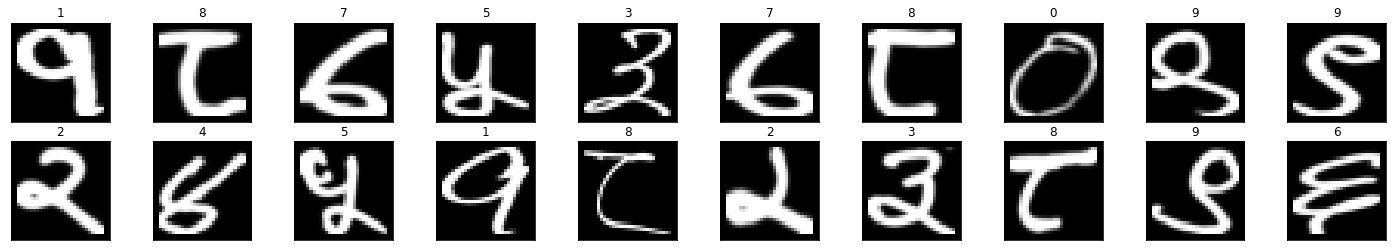

In [0]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.transpose(images[idx], (1, 2, 0)))
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

### Pre-processing: scaling from -1 to 1

We need to do a bit of pre-processing; we know that the output of our `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [0]:
# current range
img = images[0]

print('Min: ', img.min())
print('Max: ', img.max())

Min:  tensor(0.)
Max:  tensor(1.)


In [0]:
# helper scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    min, max = feature_range
    x = x * (max - min) + min
    return x


In [0]:
# scaled range
scaled_img = scale(img)

print('Scaled min: ', scaled_img.min())
print('Scaled max: ', scaled_img.max())

Scaled min:  tensor(-1.)
Scaled max:  tensor(1.)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator


In [0]:
import torch.nn as nn
import torch.nn.functional as F

# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)


In [0]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim=32):
        super(Discriminator, self).__init__()

        # complete init function
        self.conv_dim = conv_dim

        self.fc_y = nn.Linear(10,32*32*1)

        # 32x32 input
        self.conv1 = conv(3+1, conv_dim, 4, batch_norm=False) # first layer, no batch_norm
        # 16x16 out
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        # 8x8 out
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        # 4x4 out
        
        # final, fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 10)

    def forward(self, x, y):
        # print("D:x -> ", x.shape)
        # print("D:y -> ", y.shape)
        y = self.fc_y(y)
        # print('D:y -> fc ->', y.shape)
        y = y.view(-1,1,32,32)
        out = torch.cat([x,y],1)

        # all hidden layers + leaky relu activation
        out = F.leaky_relu(self.conv1(out), 0.2)
        out = F.leaky_relu(self.conv2(out), 0.2)
        out = F.leaky_relu(self.conv3(out), 0.2)
        
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output layer
        out = self.fc(out)
        # out = F.sigmoid(out)        
        return out
    

## Generator


In [0]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)


In [0]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim=32):
        super(Generator, self).__init__()

        # complete init function
        
        self.conv_dim = conv_dim
        
        # first, fully-connected layer for noise input(z) and label(y)
        self.fc_z = nn.Linear(z_size, conv_dim*4*4*2)
        self.fc_y = nn.Linear(10, conv_dim*4*4*2)

        # transpose conv layers
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)
        

    def forward(self, x, y):
        # fully-connected + reshape 
        z_out = self.fc_z(x)
        y_out = self.fc_y(y)
        out = torch.cat([z_out,y_out],1)

        out = out.view(-1, self.conv_dim*4, 4, 4) # (batch_size, depth, 4, 4)
        
        # hidden transpose conv layers + relu
        out = F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))
        
        # last layer + tanh activation
        out = self.t_conv3(out)
        # out = F.sigmoid(out)
        out = F.tanh(out)
        
        return out
    

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [0]:
# define hyperparams
conv_dim = 32
z_size = 100

# define discriminator and generator
D = Discriminator(conv_dim)
G = Generator(z_size=z_size, conv_dim=conv_dim)

print(D)
print()
print(G)

Discriminator(
  (fc_y): Linear(in_features=10, out_features=1024, bias=True)
  (conv1): Sequential(
    (0): Conv2d(4, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

Generator(
  (fc_z): Linear(in_features=100, out_features=1024, bias=True)
  (fc_y): Linear(in_features=10, out_features=1024, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

### Training on GPU

Check if you can train on GPU. If you can, set this as a variable and move your models to GPU. 
> Later, we'll also move any inputs our models and loss functions see (real_images, z, and ground truth labels) to GPU as well.

In [0]:
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    # move models to GPU
    G.cuda()
    D.cuda()
    print('GPU available for training. Models moved to GPU')
else:
    print('Training on CPU.')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

GPU available for training. Models moved to GPU
Device:  cuda


---
## Discriminator and Generator Losses


In [0]:
def real_loss(D_out, labels, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
      # smooth, real labels = 0.9
      labels = labels*0.9
    # else:
    #     labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # binary cross entropy with logits loss
    criterion = nn.CrossEntropyLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out, labels):
    batch_size = D_out.size(0)
    # labels = torch.zeros(batch_size) # fake labels = 0
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.CrossEntropyLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers


In [0]:
import torch.optim as optim

# params
lr = 0.0002
beta1=0.5
beta2=0.999 # default value

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training


In [0]:
y1 = np.arange(10)
y2 =  np.arange(10)
y3 = np.arange(10)
y4 =  np.arange(10)
y5 = np.arange(10)
y6 =  np.arange(10)
y7 = np.arange(10)
y8 =  np.arange(10)
y9 = np.arange(10)
y10 =  np.arange(10)

y = np.concatenate([y1,y2, y3, y4, y5, y6, y7, y8, y9, y10])

print(y.shape)
print(y)

(100,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [0]:
import torchvision.utils as vutils
import matplotlib.animation as animation
from IPython.display import HTML

### Training

In [0]:
import pickle as pkl

# training hyperparams
num_epochs = 300
batch_size = 128
# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 300
n_classes = 10

# Get some fixed data for samplreing. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
# sample_size=20
# fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
# fixed_z = torch.from_numpy(fixed_z).float()

rows = 10
sample_size = n_classes*rows

samples = []

fixed_noise = torch.randn(sample_size, z_size, device=device)
y_onehot_sample = torch.FloatTensor(sample_size, n_classes).to(device)
sample_labels = torch.from_numpy(y).long().view(-1,1).to(device)

# One hot encoding buffer that you create out of the loop and just keep reusing
y_onehot = torch.FloatTensor(batch_size, n_classes).to(device)
gen_y_onehot = torch.FloatTensor(batch_size, n_classes).to(device)

# Comment this to continue training from previous run
d_optimizer.zero_grad()
g_optimizer.zero_grad()


# train the network
for epoch in range(num_epochs):
    
    for batch_i, (real_images, labels) in enumerate(train_loader):
                
        if real_images.size(0) == batch_size:
          
          labels = labels.view(-1,1).to(device)
          # In your for loop
          y_onehot.zero_()
          y_onehot.scatter_(1, labels, 1)

          # Adversarial ground truths
          real = torch.full((batch_size,), 1.0, dtype=torch.long)
          fake = torch.full((batch_size,), 0.0, dtype=torch.long)

          # important rescaling step
          real_images = scale(real_images)
          
          # ============================================
          #            TRAIN THE DISCRIMINATOR
          # ============================================
          
          d_optimizer.zero_grad()
          
          # 1. Train with real images

          # Compute the discriminator losses on real images 
          if train_on_gpu:
              real_images = real_images.cuda()
              y_onehot = y_onehot.cuda()
              real = real.cuda()
              fake = fake.cuda()
          
          D_real = D(real_images, y_onehot)
          d_real_loss = real_loss(D_real, real)
          
          # 2. Train with fake images
          
          # Generate fake images
          # z = np.random.uniform(-1, 1, size=(batch_size, z_size))
          # z = torch.from_numpy(z).float()
          z = torch.randn(batch_size, z_size, device=device)

          # move x to GPU, if available
          if train_on_gpu:
              z = z.cuda()

          fake_images = G(z, y_onehot)
          
          # Compute the discriminator losses on fake images            
          D_fake = D(fake_images, y_onehot)
          d_fake_loss = fake_loss(D_fake, fake)
          
          # add up loss and perform backprop
          d_loss = d_real_loss + d_fake_loss
          d_loss.backward()
          d_optimizer.step()
          
          
          # =========================================
          #            TRAIN THE GENERATOR
          # =========================================
          g_optimizer.zero_grad()
          
          # 1. Train with fake images and flipped labels
          
          # Generate fake images
          # z = np.random.uniform(-1, 1, size=(batch_size, z_size))
          # z = torch.from_numpy(z).float()
          z = torch.randn(batch_size, z_size, device=device)

          # gen_labels = np.random.randint(0, n_classes, batch_size)
          # gen_labels = torch.from_numpy(gen_labels).to(device=device, dtype=torch.int64)
          # gen_labels = torch.LongTensor(batch_size).random_(0, 10).to(device=device, dtype=torch.long)
          gen_labels = torch.empty(batch_size, dtype=torch.long).random_(n_classes)
          gen_labels = gen_labels.view(-1,1).to(device)
          # In your for loop
          gen_y_onehot.zero_()
          gen_y_onehot.scatter_(1, gen_labels, 1)

          if train_on_gpu:
            z = z.cuda()
            gen_y_onehot = gen_y_onehot.cuda()


          fake_images = G(z, gen_y_onehot)
          
          # Compute the discriminator losses on fake images 
          # using flipped labels!
          D_fake = D(fake_images, gen_y_onehot)
          g_loss = real_loss(D_fake, real) # use real loss to flip labels
          
          # perform backprop
          g_loss.backward()
          g_optimizer.step()

          # Print some loss stats
          if batch_i % print_every == 0:
              # append discriminator loss and generator loss
              losses.append((d_loss.item(), g_loss.item()))
              # print discriminator and generator loss
              print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                      epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##    
    if epoch%20 == 0:
      # generate and save sample, fake images
      G.eval() # for generating samples
      
      y_onehot_sample.zero_()
      y_onehot_sample.scatter_(1, sample_labels, 1)

      if train_on_gpu:
          fixed_noise = fixed_noise.cuda()
          y_onehot_sample = y_onehot_sample.cuda()

      sample_z = G(fixed_noise, y_onehot_sample)
      samples.append(vutils.make_grid(sample_z,nrow=10, padding=2, normalize=True))

      G.train() # back to training mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/  300] | d_loss: 5.0372 | g_loss: 2.4251
Epoch [    2/  300] | d_loss: 0.0356 | g_loss: 5.4531
Epoch [    3/  300] | d_loss: 0.0112 | g_loss: 6.3116
Epoch [    4/  300] | d_loss: 0.0200 | g_loss: 6.0999
Epoch [    5/  300] | d_loss: 0.0164 | g_loss: 6.9266
Epoch [    6/  300] | d_loss: 0.0123 | g_loss: 7.3554
Epoch [    7/  300] | d_loss: 0.0537 | g_loss: 6.9425
Epoch [    8/  300] | d_loss: 0.0132 | g_loss: 6.9758
Epoch [    9/  300] | d_loss: 0.0197 | g_loss: 6.6190
Epoch [   10/  300] | d_loss: 0.0073 | g_loss: 6.8141
Epoch [   11/  300] | d_loss: 0.0069 | g_loss: 7.0480
Epoch [   12/  300] | d_loss: 0.0066 | g_loss: 6.9776
Epoch [   13/  300] | d_loss: 0.0337 | g_loss: 6.6601
Epoch [   14/  300] | d_loss: 0.0371 | g_loss: 6.0491
Epoch [   15/  300] | d_loss: 0.0089 | g_loss: 8.1546
Epoch [   16/  300] | d_loss: 0.0126 | g_loss: 7.1176
Epoch [   17/  300] | d_loss: 0.0201 | g_loss: 6.3169
Epoch [   18/  300] | d_loss: 0.0089 | g_loss: 7.0498
Epoch [   19/  300] | d_loss

### Comparing real and generated images

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


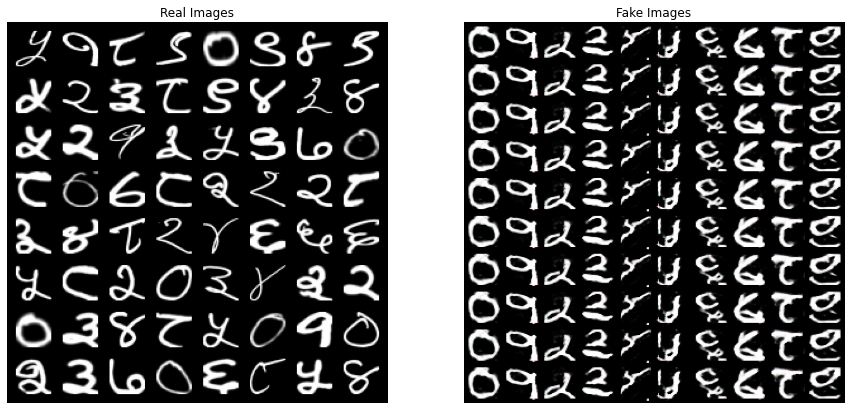

In [0]:
# After 300 epochs , with normal distribution for latent z

n_classes = 10
rows = 10
sample_size = n_classes*rows
samples_copy = []

fixed_noise = torch.randn(sample_size, z_size, device=device)
y_onehot_sample = torch.FloatTensor(sample_size, n_classes).to(device)
sample_labels = torch.from_numpy(y).long().view(-1,1).to(device)

y_onehot_sample.zero_()
y_onehot_sample.scatter_(1, sample_labels, 1)

if train_on_gpu:
    fixed_noise = fixed_noise.cuda()
    y_onehot_sample = y_onehot_sample.cuda()

sample_z = G(fixed_noise, y_onehot_sample)
samples_copy.append(vutils.make_grid(sample_z,nrow=10, padding=2, normalize=True))

# Grab a batch of real images from the dataloader
real_batch = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(samples[-1].cpu().detach().numpy(),(1,2,0)))
plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


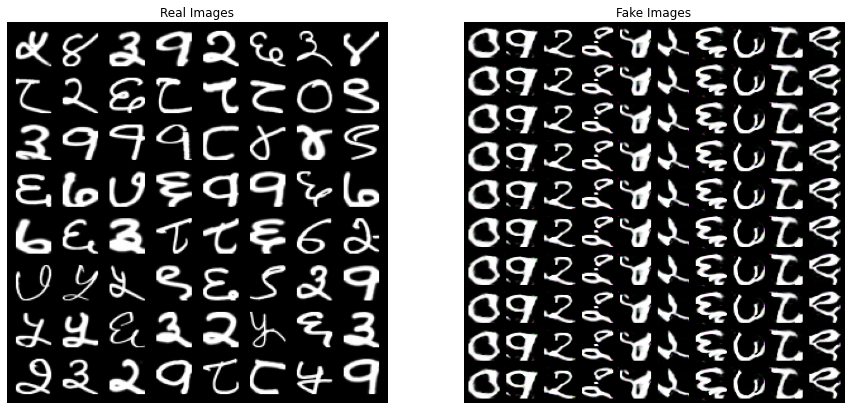

In [0]:
n_classes = 10
rows = 10
sample_size = n_classes*rows
samples_copy = []

fixed_noise = torch.randn(sample_size, z_size, device=device)
y_onehot_sample = torch.FloatTensor(sample_size, n_classes).to(device)
sample_labels = torch.from_numpy(y).long().view(-1,1).to(device)

y_onehot_sample.zero_()
y_onehot_sample.scatter_(1, sample_labels, 1)

if train_on_gpu:
    fixed_noise = fixed_noise.cuda()
    y_onehot_sample = y_onehot_sample.cuda()

sample_z = G(fixed_noise, y_onehot_sample)
samples_copy.append(vutils.make_grid(sample_z,nrow=10, padding=2, normalize=True))

# Grab a batch of real images from the dataloader
real_batch = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(samples[-1].cpu().detach().numpy(),(1,2,0)))
plt.show()

### Generating digits one at a time on demand

In [0]:
import warnings 
warnings.filterwarnings("ignore")

def generate_hindi_digit(digit):
  n_classes = 10
  sample_size = 1

  z_normal = torch.randn(sample_size, z_size, device=device)
  z_uniform = np.random.uniform(-1, 1, size=(sample_size, z_size))
  z_uniform = torch.from_numpy(z_uniform).float()

  y_onehot_sample = torch.FloatTensor(sample_size, n_classes).to(device)
  y = np.array([digit])
  sample_labels = torch.from_numpy(y).long().view(-1,1).to(device)

  y_onehot_sample.zero_()
  y_onehot_sample.scatter_(1, sample_labels, 1)

  if train_on_gpu:
      z_normal = z_normal.cuda()
      z_uniform = z_uniform.cuda()
      y_onehot_sample = y_onehot_sample.cuda()

  sample_z_normal = G(z_normal, y_onehot_sample)
  samples.append(vutils.make_grid(sample_z_normal, nrow=1, padding=2, normalize=True))

  sample_z_uniform = G(z_uniform, y_onehot_sample)
  samples.append(vutils.make_grid(sample_z_uniform, nrow=1, padding=2, normalize=True))


  # Plot the fake images from the last epoch
  plt.figure(figsize=(8,10))
  plt.subplot(1,2,1)
  plt.axis("off")
  plt.title("Digit " + str(digit) + ": Using Normal sampling")
  plt.imshow(np.transpose(samples[-2].cpu().detach().numpy(),(1,2,0)))

  plt.subplot(1,2,2)
  plt.axis("off")
  plt.title("Digit " + str(digit) + ": Using Uniform sampling")
  plt.imshow(np.transpose(samples[-1].cpu().detach().numpy(),(1,2,0)))
  plt.show()

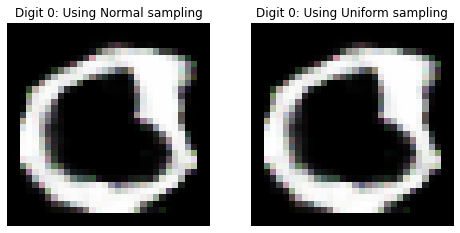

In [0]:
generate_hindi_digit(0)

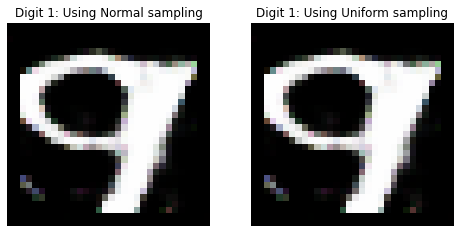

In [0]:
generate_hindi_digit(1)

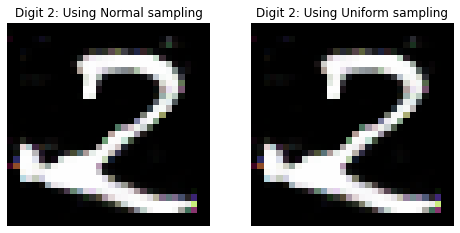

In [0]:
generate_hindi_digit(2)

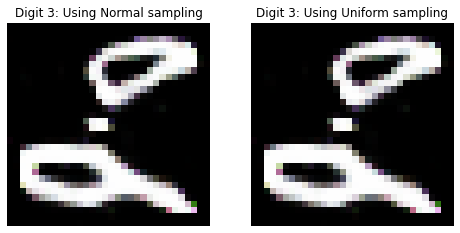

In [0]:
generate_hindi_digit(3)

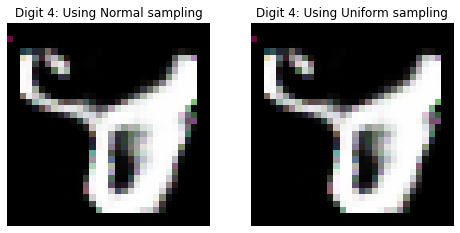

In [0]:
generate_hindi_digit(4)

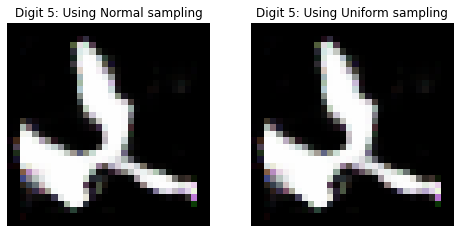

In [0]:
generate_hindi_digit(5)

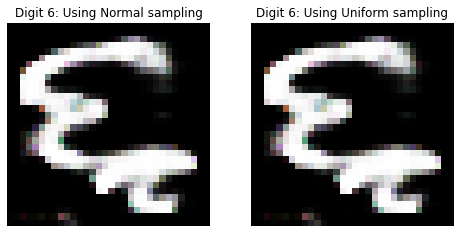

In [0]:
generate_hindi_digit(6)

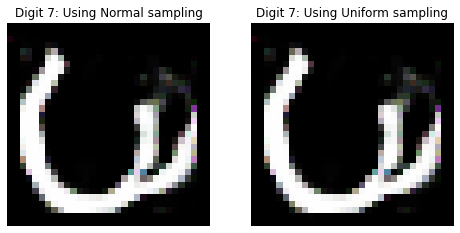

In [0]:
generate_hindi_digit(7)

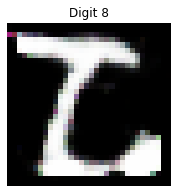

In [0]:
generate_hindi_digit(8)

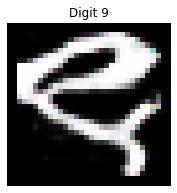

In [0]:
generate_hindi_digit(9)

### Run for 500 epochs with Gaussian distribution for samples + training Animation


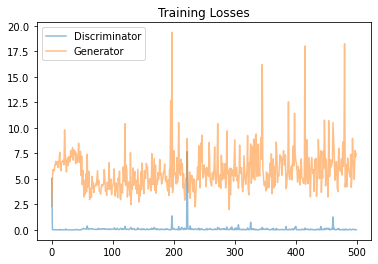

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

Generated image after 500 epochs   
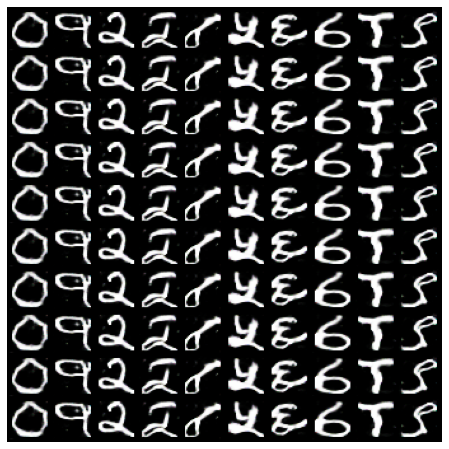

### Run for 1000 epochs with animation

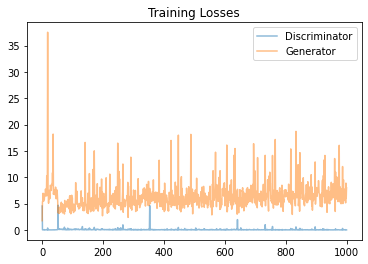

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

Generated Image   
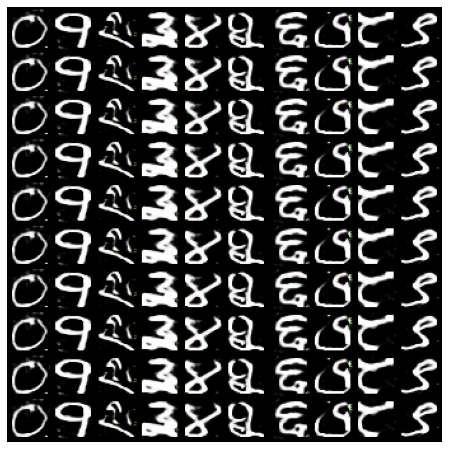

### Run 300 epochs with Gaussian latent z in training

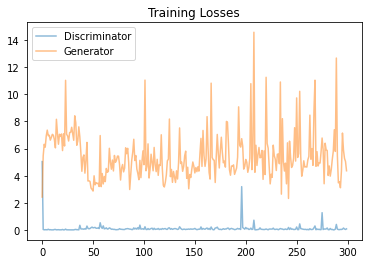

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()